In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GSPC=pd.read_csv('GSPC.csv',index_col='Date')
GSPC=GSPC.iloc[:,1:]
GSPC.index=pd.to_datetime(GSPC.index)
GSPC.head()

Open         High          Low        Close        Volume
Date                                                                        
2014-01-02  1845.859985  1845.859985  1827.739990  1831.979980  3.080600e+09
2014-01-03  1833.209961  1838.239990  1829.130005  1831.369995  2.774270e+09
2014-01-06  1832.310059  1837.160034  1823.729980  1826.770020  3.294850e+09
2014-01-07  1828.709961  1840.099976  1828.709961  1837.880005  3.511750e+09
2014-01-08  1837.900024  1840.020020  1831.400024  1837.489990  3.652140e+09

In [3]:
close=GSPC.Close
high=GSPC.High
low=GSPC.Low

In [4]:
close

Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
2014-01-09    1838.130005
2014-01-10    1842.369995
2014-01-13    1819.199951
2014-01-14    1838.880005
2014-01-15    1848.380005
2014-01-16    1845.890015
2014-01-17    1838.699951
2014-01-21    1843.800049
2014-01-22    1844.859985
2014-01-23    1828.459961
2014-01-24    1790.290039
2014-01-27    1781.560059
2014-01-28    1792.500000
2014-01-29    1774.199951
2014-01-30    1794.189941
2014-01-31    1782.589966
2014-02-03    1741.890015
2014-02-04    1755.199951
2014-02-05    1751.640015
2014-02-06    1773.430054
2014-02-07    1797.020020
2014-02-10    1799.839966
2014-02-11    1819.750000
2014-02-12    1819.260010
2014-02-13    1829.829956
                 ...     
2015-03-19    2089.270020
2015-03-20    2108.100098
2015-03-23    2104.419922
2015-03-24    2091.500000
2015-03-25    2061.050049
2015-03-26    2056.149902
2015-03-27    2061.020020
2015-03

In [5]:

date=close.index.to_series()
ndate=len(date)

In [6]:
ndate

334

In [7]:

periodHigh=pd.Series(np.zeros(ndate-8),\
                  index=date.index[8:])
periodLow=pd.Series(np.zeros(ndate-8),\
                    index=date.index[8:])

In [8]:
RSV=pd.Series(np.zeros(ndate-8),\
               index=date.index[8:])

In [9]:
RSV

Date
2014-01-14    0.0
2014-01-15    0.0
2014-01-16    0.0
2014-01-17    0.0
2014-01-21    0.0
2014-01-22    0.0
2014-01-23    0.0
2014-01-24    0.0
2014-01-27    0.0
2014-01-28    0.0
2014-01-29    0.0
2014-01-30    0.0
2014-01-31    0.0
2014-02-03    0.0
2014-02-04    0.0
2014-02-05    0.0
2014-02-06    0.0
2014-02-07    0.0
2014-02-10    0.0
2014-02-11    0.0
2014-02-12    0.0
2014-02-13    0.0
2014-02-14    0.0
2014-02-18    0.0
2014-02-19    0.0
2014-02-20    0.0
2014-02-21    0.0
2014-02-24    0.0
2014-02-25    0.0
2014-02-26    0.0
             ... 
2015-03-19    0.0
2015-03-20    0.0
2015-03-23    0.0
2015-03-24    0.0
2015-03-25    0.0
2015-03-26    0.0
2015-03-27    0.0
2015-03-30    0.0
2015-03-31    0.0
2015-04-01    0.0
2015-04-02    0.0
2015-04-06    0.0
2015-04-07    0.0
2015-04-08    0.0
2015-04-09    0.0
2015-04-10    0.0
2015-04-13    0.0
2015-04-14    0.0
2015-04-15    0.0
2015-04-16    0.0
2015-04-17    0.0
2015-04-20    0.0
2015-04-21    0.0
2015-04-22    0.0
2015-

In [10]:
for j in range(8,ndate):
    period=date[j-8:j+1]
    i=date[j]
    periodHigh[i]=high[period].max()
    periodLow[i]=low[period].min()
    RSV[i]=100*(close[i]-periodLow[i])\
           /(periodHigh[i]-periodLow[i])
    periodHigh.name='periodHigh'
    periodLow.name='periodLow'
    RSV.name='RSV'

In [11]:
periodHigh.head(3)
periodLow.head(3)
RSV.head()
RSV.describe()

count    326.000000
mean      63.558226
std       31.525472
min        0.000000
25%       37.323359
50%       72.580422
75%       91.854801
max      100.000000
Name: RSV, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020758ECD278>,
      dtype=object)

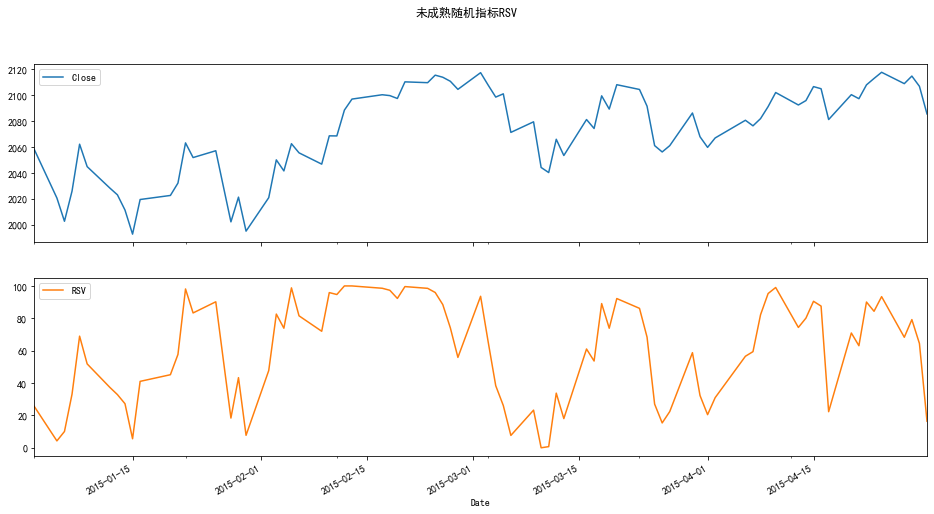

In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei']

close1=close['2015']
RSV1=RSV['2015']
Cl_RSV=pd.DataFrame([close1,RSV1]).transpose()
Cl_RSV.plot(subplots=True,
             title='未成熟随机指标RSV',figsize=(16, 8))

In [13]:
!pip install mpl_finance

C:\Users\netease\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)
C:\Users\netease\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\netease\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

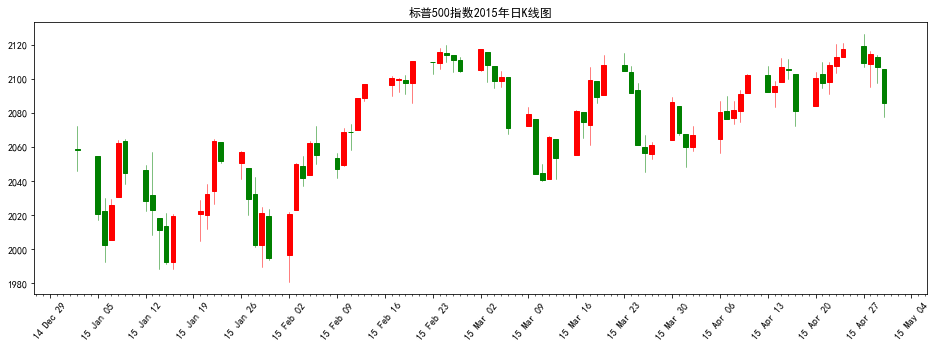

In [14]:
GSPC2015=GSPC['2015']
plt.figure(figsize=(16,5))
import candle
candle.candlePlot(GSPC2015,\
                '标普500指数2015年日K线图')

In [15]:
RSV1=pd.Series([50,50],index=date[6:8]).append(RSV)
RSV1.name='RSV'
RSV1.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    76.994107
2014-01-15    93.035207
2014-01-16    85.985395
Name: RSV, dtype: float64

In [16]:
KValue=pd.Series(0.0,index=RSV1.index)

In [17]:
KValue[0]=50
for i in range(1,len(RSV1)):
    KValue[i]=2/3*KValue[i-1]+RSV1[i]/3
KValue.name='KValue'
KValue.head()

Date
2014-01-10    50.000000
2014-01-13    50.000000
2014-01-14    58.998036
2014-01-15    70.343759
2014-01-16    75.557638
Name: KValue, dtype: float64

In [18]:
DValue=pd.Series(0.0,index=RSV1.index)
DValue[0]=50
for i in range(1,len(RSV1)):
    DValue[i]=2/3*DValue[i-1]+KValue[i]/3

KValue=KValue[1:]
DValue.name='DValue'
DValue=DValue[1:]
DValue.head()

Date
2014-01-13    50.000000
2014-01-14    52.999345
2014-01-15    58.780817
2014-01-16    64.373090
2014-01-17    66.998029
Name: DValue, dtype: float64

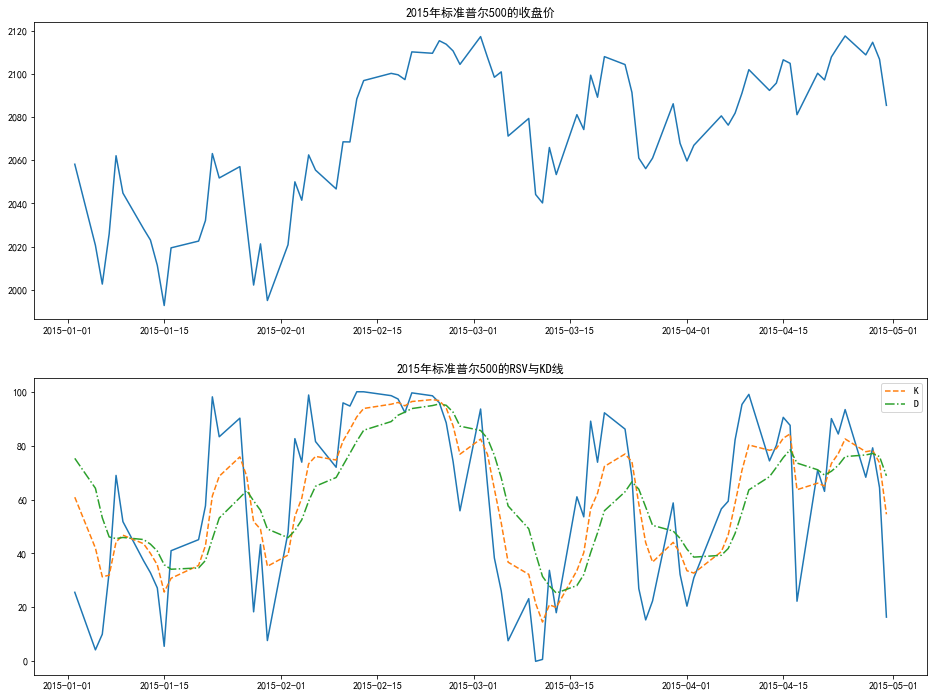

In [19]:
plt.figure(figsize=(16,12))
plt.rcParams['font.family']=['SimHei']
plt.subplot(211)
plt.title('2015年标准普尔500的收盘价')
plt.plot(close['2015'])
plt.subplot(212)
plt.title('2015年标准普尔500的RSV与KD线')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'],linestyle='dashed',label='K')
plt.plot(DValue['2015'],linestyle='-.',label='D')
plt.legend(loc='best')

In [20]:
JValue=3*KValue-2*DValue
JValue.name='JValue'
JValue.head()

Date
2014-01-13    50.000000
2014-01-14    70.995416
2014-01-15    93.469645
2014-01-16    97.926733
2014-01-17    82.747662
Name: JValue, dtype: float64

C:\Users\netease\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\netease\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


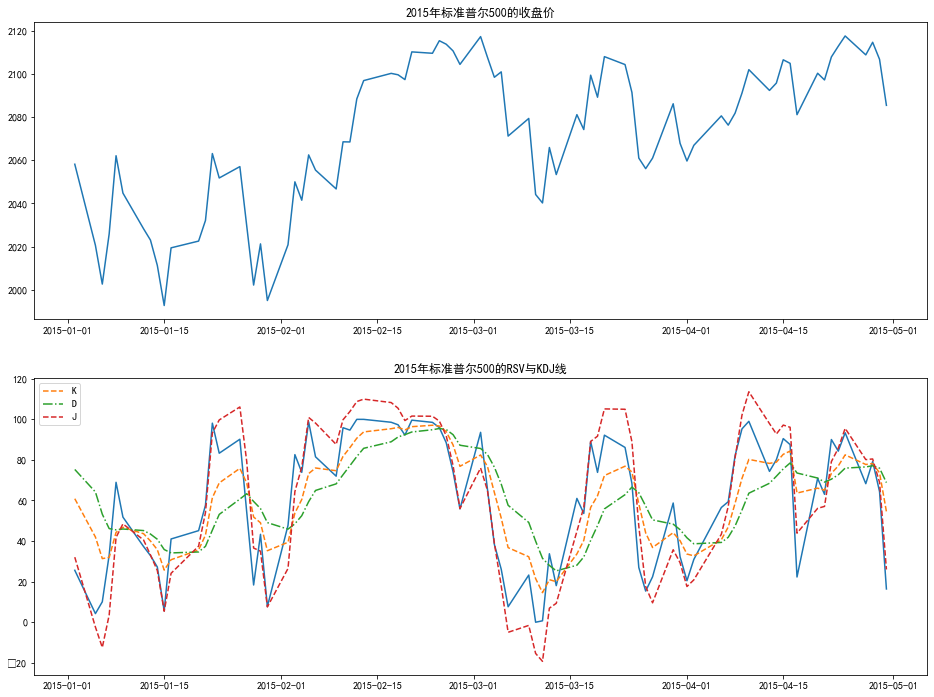

In [21]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.title('2015年标准普尔500的收盘价')
plt.plot(close['2015'])
plt.subplot(212)
plt.title('2015年标准普尔500的RSV与KDJ线')
plt.plot(RSV['2015'])
plt.plot(KValue['2015'],linestyle='dashed',label='K')
plt.plot(DValue['2015'],linestyle='-.',label='D')
plt.plot(JValue['2015'],linestyle='--',label='J')
plt.legend(loc='upper left')

In [22]:
KSignal=KValue.apply(lambda x:\
                    -1 if x>85 else 1 if x<20 else 0)

DSignal=DValue.apply(lambda x: \
                 -1 if x>80 else 1 if x<20 else 0)
KDSignal=KSignal+DSignal
KDSignal.name='KDSignal'

KDSignal[KDSignal>=1]==1
KDSignal[KDSignal<=-1]==-1
KDSignal.head(n=3)
KDSignal[KDSignal==1].head(n=3)

Date
2014-02-03    1
2014-02-04    1
2014-08-06    1
Name: KDSignal, dtype: int64

In [23]:
def trade(signal,price):
    ret=((price-price.shift(1))/price.shift\
         (1))[1:]
    ret.name='ret'
    signal=signal.shift(1)[1:]
    tradeRet=ret*signal+0
    tradeRet.name='tradeRet'
    Returns=pd.merge(pd.DataFrame(ret),\
                     pd.DataFrame(tradeRet),
                     left_index=True,\
                     right_index=True).dropna()
    return(Returns)

In [24]:
KDtrade=trade(KDSignal,close)
KDtrade.rename(columns={'ret':'Ret',\
              'tradeRet':'KDtradeRet'},\
               inplace=True)
KDtrade.head()

Ret  KDtradeRet
Date                            
2014-01-14  0.010818         0.0
2014-01-15  0.005166         0.0
2014-01-16 -0.001347         0.0
2014-01-17 -0.003895         0.0
2014-01-21  0.002774         0.0

In [25]:
!pip install ffn

In [26]:
import ffn
def backtest(ret,tradeRet):
    def performance(x):
        winpct=len(x[x>0])/len(x[x!=0])
        annRet=(1+x).cumprod()[-1]**(245/len(x))-1
        sharpe=ffn.calc_risk_return_ratio(x)
        maxDD=ffn.calc_max_drawdown((1+x).cumprod())
        perfo=pd.Series([winpct,annRet,sharpe,maxDD],\
        index=['win rate','annualized return',\
        'sharpe ratio','maximum drawdown'])
        return(perfo)
    BuyAndHold=performance(ret)
    Trade=performance(tradeRet)
    return(pd.DataFrame({ret.name:BuyAndHold,\
           tradeRet.name:Trade}))

In [28]:

backtest(KDtrade.Ret[:'2014-10-10'],\
          KDtrade.KDtradeRet[:'2014-10-10'])

Ret  KDtradeRet
win rate           0.569149    0.500000
annualized return  0.062719    0.073788
sharpe ratio       0.039369    0.074971
maximum drawdown  -0.057613   -0.030184

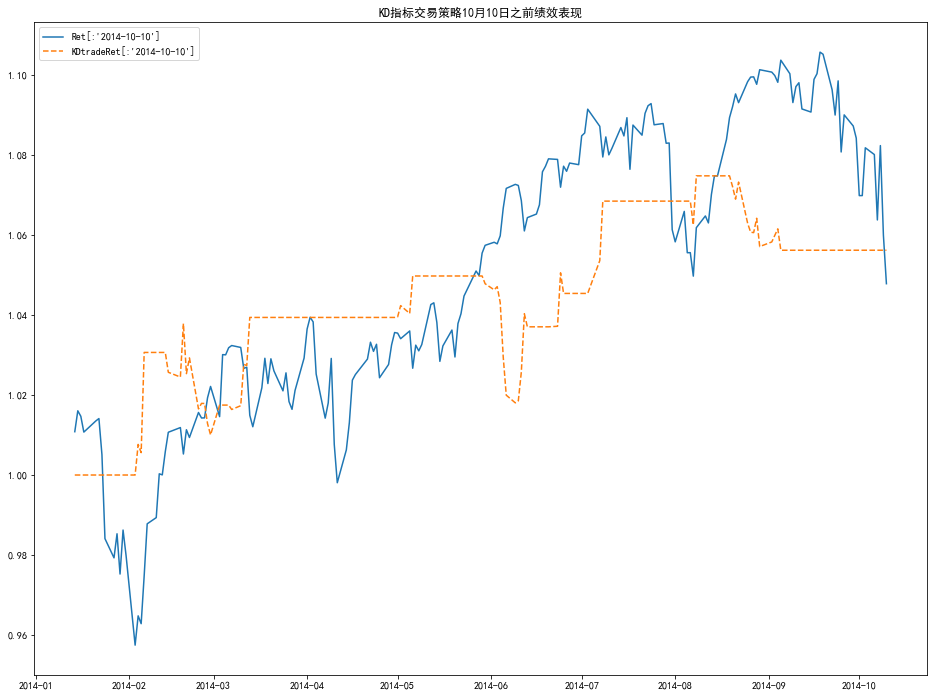

In [29]:
cumRets2=(1+KDtrade[:'2014-10-10']).cumprod()
plt.figure(figsize=(16,12))
plt.plot(cumRets2.Ret,\
          label='''Ret[:'2014-10-10']''')
plt.plot(cumRets2.KDtradeRet,'--',\
          label='''KDtradeRet[:'2014-10-10']''')
plt.title('KD指标交易策略10月10日之前绩效表现')
plt.legend(loc='upper left')